In [8]:
import os
import sys
sys.path.append("..")
from nebula.misc.plots import readCrossValidationMetricFile
from nebula.misc import get_path

SCRIPT_ROOT = get_path(type="notebook")
REPO_ROOT = os.path.join(SCRIPT_ROOT, "..", "..")

metricFiles = {
    "cnn": r"evaluation\crossValidation\_modelSelection_50k\CNNLinear\metrics_trainSize_76126_ep_3_cv_2_vocabSize_50000_embeddingDim_64_hiddenNeurons_512_256_128_batchNormConv_False_batchNormFFNN_False_filterSizes_2_3_4_5_dropout_0.3.json",
    "lstm": r"evaluation\crossValidation\_modelSelection_50k\LSTM\metrics_trainSize_76126_ep_3_cv_2_vocabSize_50000_embeddingDim_64_lstmHidden_256_lstmLayers_1_lstmDropout_0.1_lstmBidirectional_True_hiddenNeurons_256_64_batchNormFFNN_False.json",
    "reformer": r"evaluation\crossValidation\_modelSelection_50k\Reformer\metrics_trainSize_76126_ep_3_cv_2_vocabSize_50000_maxLen_2048_dim_64_heads_4_depth_4_meanOverSequence_True_classifierDropout_0.3_hiddenNeurons_256_64.json",
    #"transformer": r"evaluation\crossValidation\_modelSelection_50k\Transformer\metrics_trainSize_76126_ep_3_cv_2_vocabSize_50000_maxLen_2048_dModel_64_nHeads_8_dHidden_256_nLayers_8_numClasses_1_hiddenNeurons_64_layerNorm_False_dropout_0.3.json",
    "transformer": r"evaluation\crossValidation\Transformer_512_BPE\longRun_30_epochs\metrics_trainSize_76126_ep_30_cv_3_vocabSize_50000_maxLen_512_dModel_64_nHeads_8_dHidden_256_nLayers_2_numClasses_1_hiddenNeurons_64_layerNorm_False_dropout_0.3.json",
}
for key in metricFiles:
    metricFiles[key] = os.path.join(REPO_ROOT, metricFiles[key])

metrics = {}
for file in metricFiles:
    metrics[file] = readCrossValidationMetricFile(metricFiles[file])[0]

### NOTE

Below transformer stas are trained: (1) longer (2) on 3-fold cross-validations vs 2-fold of others (i.e. larger trainset)

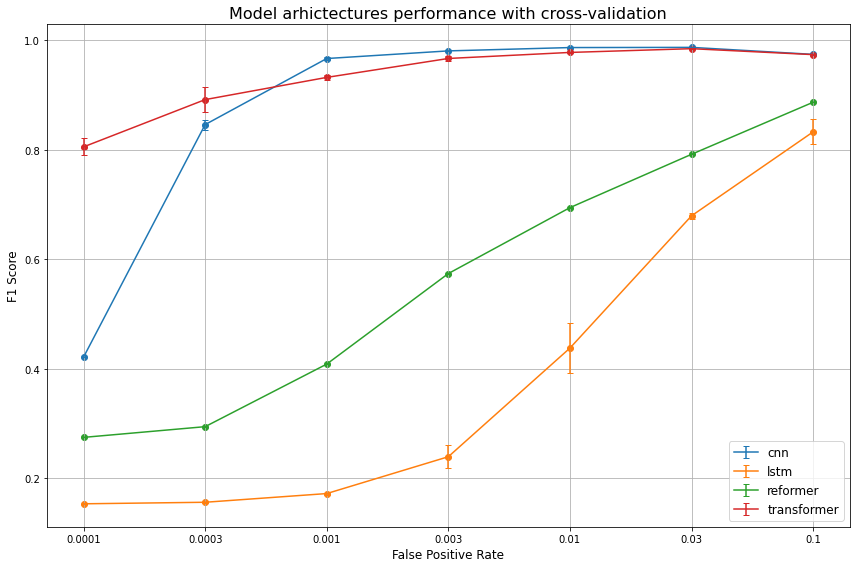

In [9]:
import matplotlib.pyplot as plt

fprates = list(metrics['cnn'].index)
fig, ax = plt.subplots(1,1, figsize=(12,8))
for key in metrics:
    f1_avg = metrics[key].loc[:, 'f1_avg']
    f1_std = metrics[key].loc[:, 'f1_std']
    # plot f1_avg and f1_std
    ax.errorbar(fprates, f1_avg, yerr=f1_std, label=key, capsize=3)
    ax.scatter(fprates, f1_avg)
ax.legend(fontsize=12)
ax.grid()
ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("F1 Score", fontsize=12)
ax.set_title("Model arhictectures performance with cross-validation", fontsize=16)
plt.tight_layout()
#plt.savefig(os.path.join(REPO_ROOT, "img", "BPE_vs_whitespace_50k.png"), dpi=300)